In [2]:
import pandas as pd 
import numpy as np 
import seaborn as sn 
import matplotlib.pyplot as plt 


In [3]:
df=pd.read_csv("D:\stirring mind\KAG_conversion_data.csv")

In [14]:
df

,ad_id,xyz_campaign_id,fb_campaign_id,age,gender,interest,Impressions,Clicks,Spent,Total_Conversion,Approved_Conversion
0,708746,916,103916,30-34,M,15,7350,1,1.430000,2,1
1,708749,916,103917,30-34,M,16,17861,2,1.820000,2,0
2,708771,916,103920,30-34,M,20,693,0,0.000000,1,0
3,708815,916,103928,30-34,M,28,4259,1,1.250000,1,0
4,708818,916,103928,30-34,M,28,4133,1,1.290000,1,1
...,...,...,...,...,...,...,...,...,...,...,...
1138,1314410,1178,179977,45-49,F,109,1129773,252,358.189997,13,2
1139,1314411,1178,179978,45-49,F,110,637549,120,173.880003,3,0
1140,1314412,1178,179979,45-49,F,111,151531,28,40.289999,2,0
1141,1314414,1178,179981,45-49,F,113,790253,135,198.710001,8,2


In [83]:
df.head()

,ad_id,xyz_campaign_id,fb_campaign_id,age,gender,interest,Impressions,Clicks,Spent,Total_Conversion,Approved_Conversion
0,708746,campaign_x,103916,30-34,M,15,7350,1,1.43,2,1
1,708749,campaign_x,103917,30-34,M,16,17861,2,1.82,2,0
2,708771,campaign_x,103920,30-34,M,20,693,0,0.00,1,0
3,708815,campaign_x,103928,30-34,M,28,4259,1,1.25,1,0
4,708818,campaign_x,103928,30-34,M,28,4133,1,1.29,1,1


In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1143 entries, 0 to 1142
Data columns (total 11 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   ad_id                1143 non-null   int64  
 1   xyz_campaign_id      1143 non-null   int64  
 2   fb_campaign_id       1143 non-null   int64  
 3   age                  1143 non-null   object 
 4   gender               1143 non-null   object 
 5   interest             1143 non-null   int64  
 6   Impressions          1143 non-null   int64  
 7   Clicks               1143 non-null   int64  
 8   Spent                1143 non-null   float64
 9   Total_Conversion     1143 non-null   int64  
 10  Approved_Conversion  1143 non-null   int64  
dtypes: float64(1), int64(8), object(2)
memory usage: 98.4+ KB


# Checking for null values

In [4]:
df.isnull().sum()

ad_id                  0
xyz_campaign_id        0
fb_campaign_id         0
age                    0
gender                 0
interest               0
Impressions            0
Clicks                 0
Spent                  0
Total_Conversion       0
Approved_Conversion    0
dtype: int64

# Checking for Duplicated values

In [7]:
df.duplicated().sum()

0

In [12]:
df.nunique()

ad_id                  1143
xyz_campaign_id           3
fb_campaign_id          691
age                       4
gender                    2
interest                 40
Impressions            1130
Clicks                  183
Spent                   869
Total_Conversion         32
Approved_Conversion      16
dtype: int64

# Exploratory Data Analysis

In [84]:
df.shape

(1143, 11)

In [18]:
df.describe()

,ad_id,xyz_campaign_id,fb_campaign_id,interest,Impressions,Clicks,Spent,Total_Conversion,Approved_Conversion
count,1.143000e+03,1143.000000,1143.000000,1143.000000,1.143000e+03,1143.000000,1143.000000,1143.000000,1143.000000
mean,9.872611e+05,1067.382327,133783.989501,32.766404,1.867321e+05,33.390201,51.360656,2.855643,0.944007
std,1.939928e+05,121.629393,20500.308622,26.952131,3.127622e+05,56.892438,86.908418,4.483593,1.737708
min,7.087460e+05,916.000000,103916.000000,2.000000,8.700000e+01,0.000000,0.000000,0.000000,0.000000
25%,7.776325e+05,936.000000,115716.000000,16.000000,6.503500e+03,1.000000,1.480000,1.000000,0.000000
50%,1.121185e+06,1178.000000,144549.000000,25.000000,5.150900e+04,8.000000,12.370000,1.000000,1.000000
75%,1.121804e+06,1178.000000,144657.500000,31.000000,2.217690e+05,37.500000,60.025000,3.000000,1.000000
max,1.314415e+06,1178.000000,179982.000000,114.000000,3.052003e+06,421.000000,639.949998,60.000000,21.000000


In [19]:
df["xyz_campaign_id"].unique()

array([ 916,  936, 1178], dtype=int64)

## Here, we see there are 3 different ad campaigns for XYZ company.

### Now we'll replace their names with campaign_x, campaign_y, and campaign_z for better visualization which creates problems with integer values

In [20]:
df["xyz_campaign_id"].replace({916:"campaign_x",936:"campaign_y",1178:"campaign_z"}, inplace=True)

In [21]:
df

,ad_id,xyz_campaign_id,fb_campaign_id,age,gender,interest,Impressions,Clicks,Spent,Total_Conversion,Approved_Conversion
0,708746,campaign_x,103916,30-34,M,15,7350,1,1.430000,2,1
1,708749,campaign_x,103917,30-34,M,16,17861,2,1.820000,2,0
2,708771,campaign_x,103920,30-34,M,20,693,0,0.000000,1,0
3,708815,campaign_x,103928,30-34,M,28,4259,1,1.250000,1,0
4,708818,campaign_x,103928,30-34,M,28,4133,1,1.290000,1,1
...,...,...,...,...,...,...,...,...,...,...,...
1138,1314410,campaign_z,179977,45-49,F,109,1129773,252,358.189997,13,2
1139,1314411,campaign_z,179978,45-49,F,110,637549,120,173.880003,3,0
1140,1314412,campaign_z,179979,45-49,F,111,151531,28,40.289999,2,0
1141,1314414,campaign_z,179981,45-49,F,113,790253,135,198.710001,8,2


<Axes: xlabel='xyz_campaign_id', ylabel='Count'>

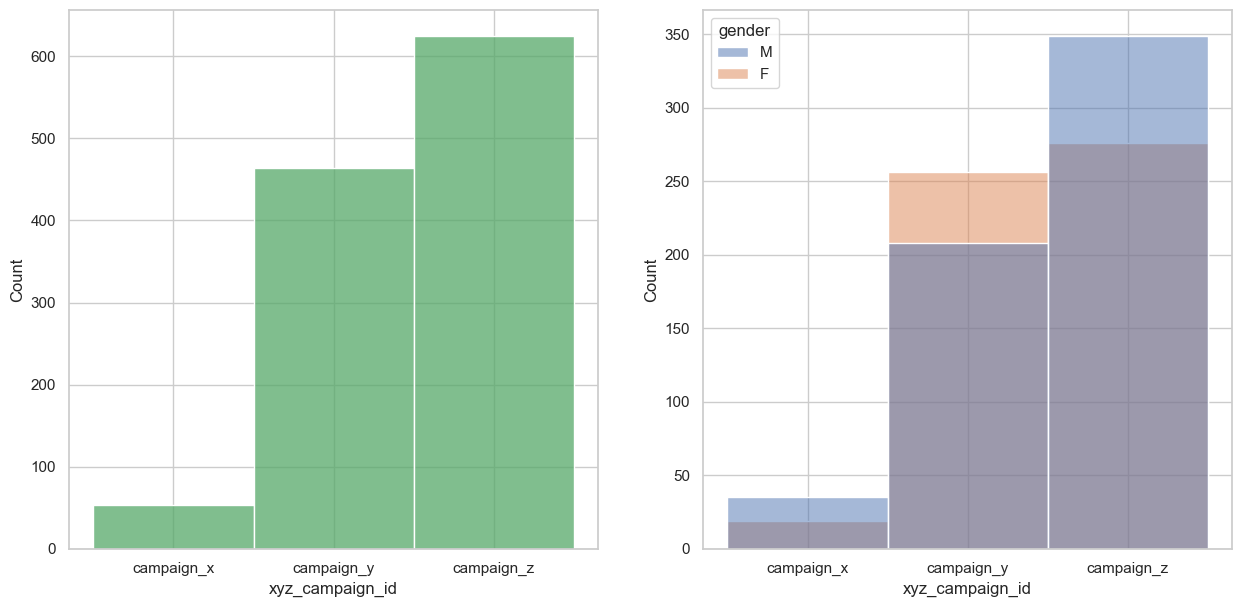

In [91]:

fig,axis=plt.subplots(1,2,figsize=(15,7))
plt.subplot(121)
sn.histplot(data=df,x='xyz_campaign_id',bins=10,color='g')
plt.subplot(122)
sn.histplot(data=df,x='xyz_campaign_id',bins=10,hue='gender')

## This shows campaign_z has the most number of ads.
## and 2nd graph shows the gender base of most number ads
## where campaingn_x and campain_z most of male
## and campaingn_y most of female

Text(0.5, 1.0, 'age distribution with gender ')

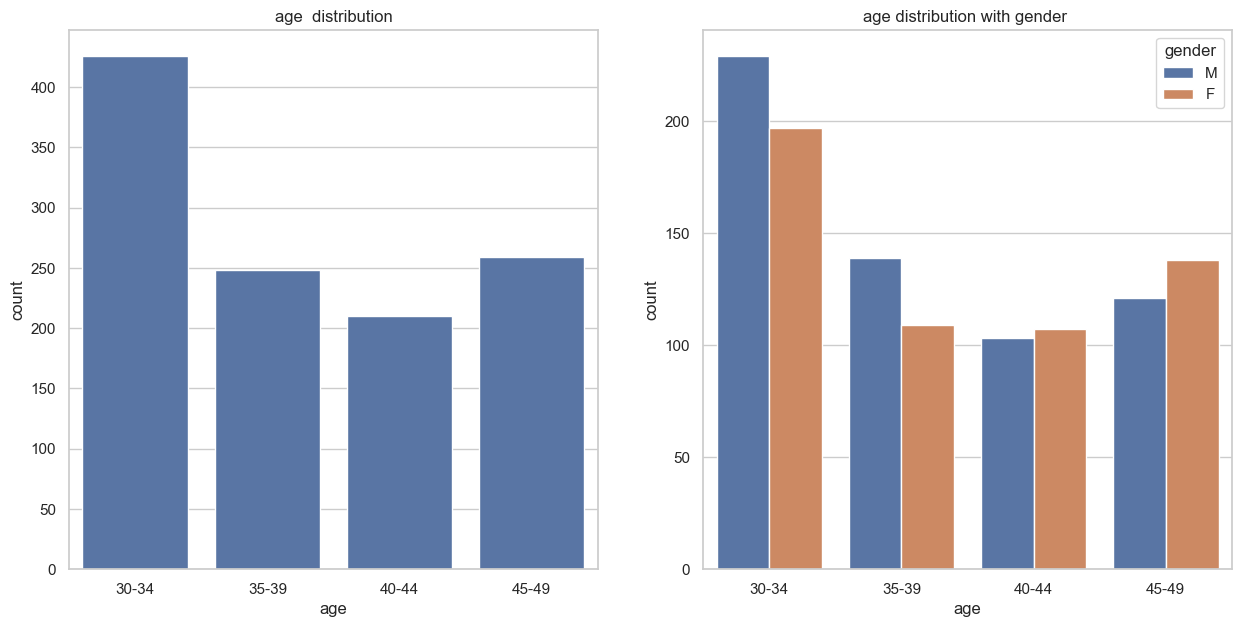

In [85]:

fig,axis=plt.subplots(1,2,figsize=(15,7))
plt.subplot(121)
sn.countplot(x ='age', data = df) 
plt.title("Age  distribution")
plt.subplot(122)
sn.countplot(x="age",data=df,hue="gender" )
plt.title("Age distribution with gender ")

## age distribution, 
## and 2nd graph age distribution with gender

Text(0.5, 1.0, 'company vs Total_Conversion')

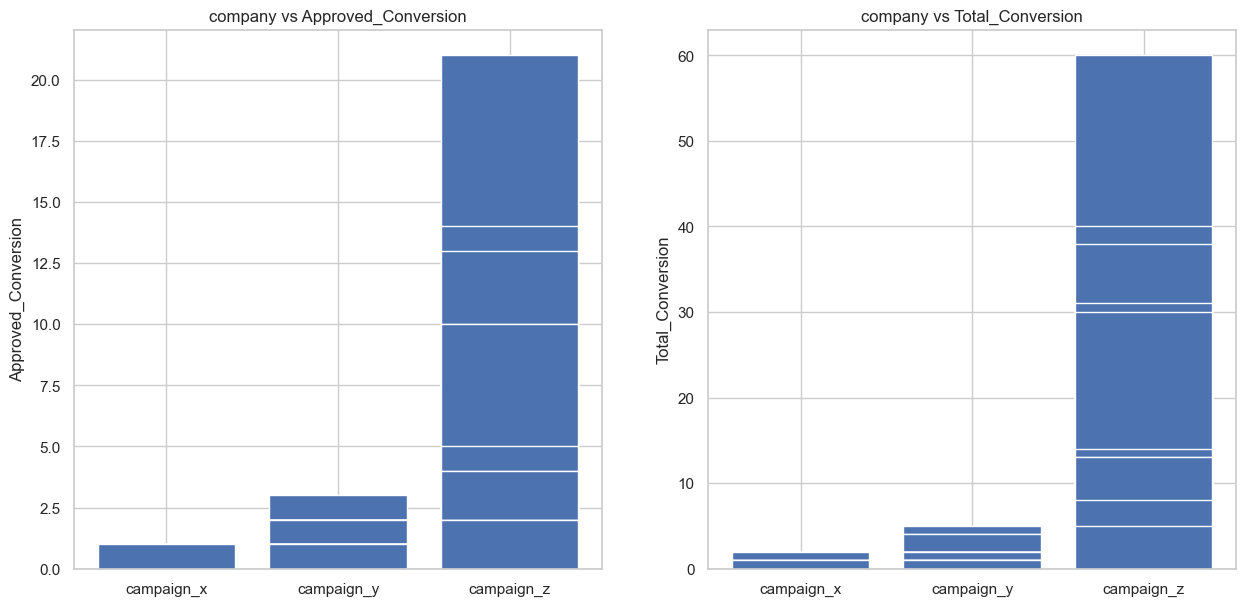

In [92]:

fig,axis=plt.subplots(1,2,figsize=(15,7))
plt.subplot(121)
plt.bar(df["xyz_campaign_id"],df["Approved_Conversion"])
plt.ylabel("Approved_Conversion")
plt.title("company vs Approved_Conversion")
plt.subplot(122)
plt.bar(df["xyz_campaign_id"],df["Total_Conversion"])
plt.ylabel("Total_Conversion")
plt.title("company vs Total_Conversion")

## It's clear from both the above graphs that campaign_Z has a better Approved_conversion count, i.e. most people bought products in campaign_z.

## Let's see the distribution with age.

Text(0.5, 1.0, 'company vs Total_Conversion')

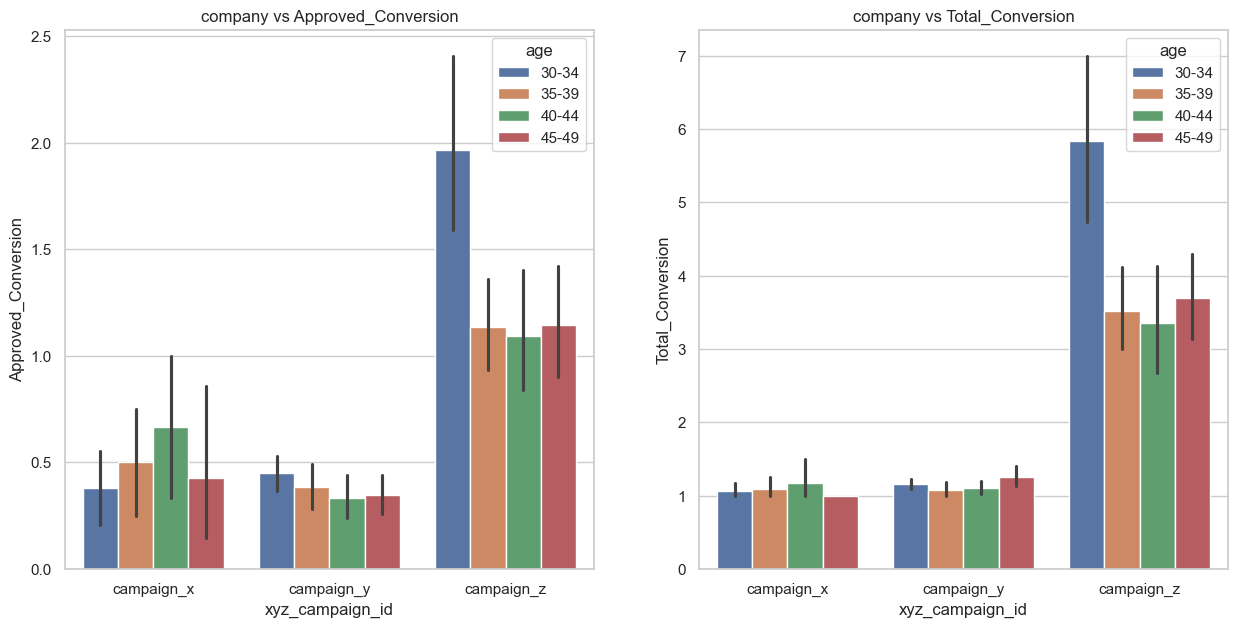

In [43]:
fig,axis=plt.subplots(1,2,figsize=(15,7))
plt.subplot(121)
sn.barplot(x=df["xyz_campaign_id"], y=df["Approved_Conversion"], hue=df["age"])
plt.title("company vs Approved_Conversion")
plt.subplot(122)
sn.barplot(x=df["xyz_campaign_id"], y=df["Total_Conversion"], hue=df["age"]) 
plt.title("company vs Total_Conversion")



## It's interesting to note that in campaign_Z and campaign_y, the age group of 30-34 shows more interest, whereas in campaign_x the age group of 40-44 shows more interest.

## Let's see the distribution with gender.

<Axes: xlabel='xyz_campaign_id', ylabel='Approved_Conversion'>

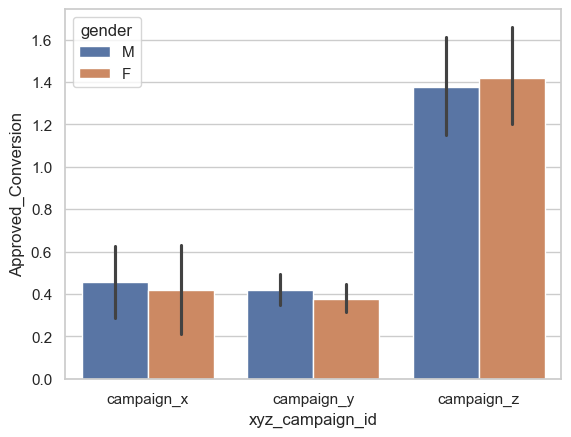

In [86]:
sn.barplot(x=df["xyz_campaign_id"], y=df["Approved_Conversion"], hue=df["gender"])

## Both the genders shows similar interests in all three campaigns.

# Interest

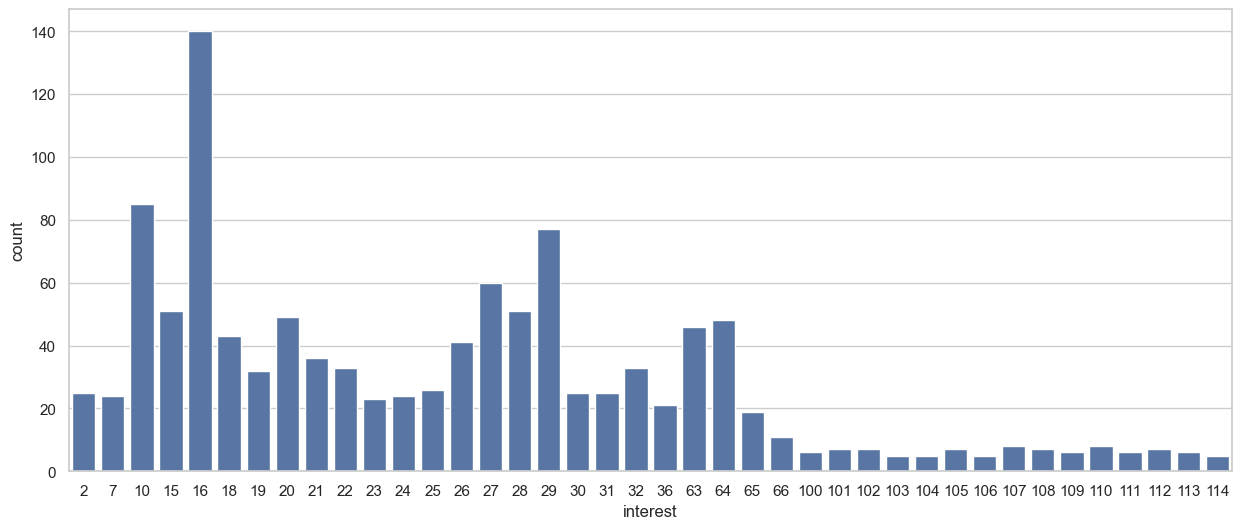

In [50]:


fig_dims = (15,6)
fig, ax = plt.subplots(figsize=fig_dims)
sn.countplot(x ='interest', data = df) 
# Show the plot 
plt.show() 

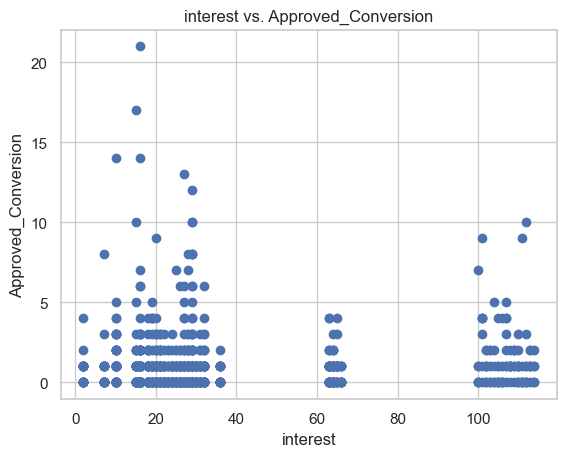

In [67]:
plt.scatter(df["interest"], df["Approved_Conversion"])
plt.title("interest vs. Approved_Conversion")
plt.xlabel("interest")
plt.ylabel("Approved_Conversion")
plt.show()




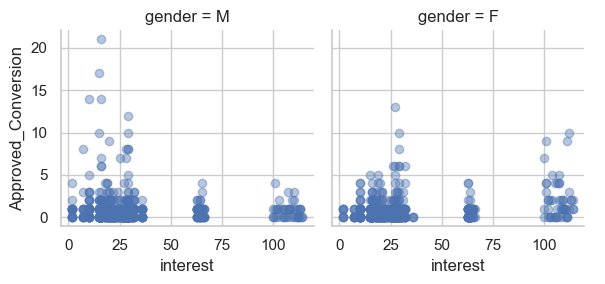

In [77]:
g = sn.FacetGrid(df, col="gender")
g.map(plt.scatter, "interest", "Approved_Conversion", alpha=.4)
g.add_legend()

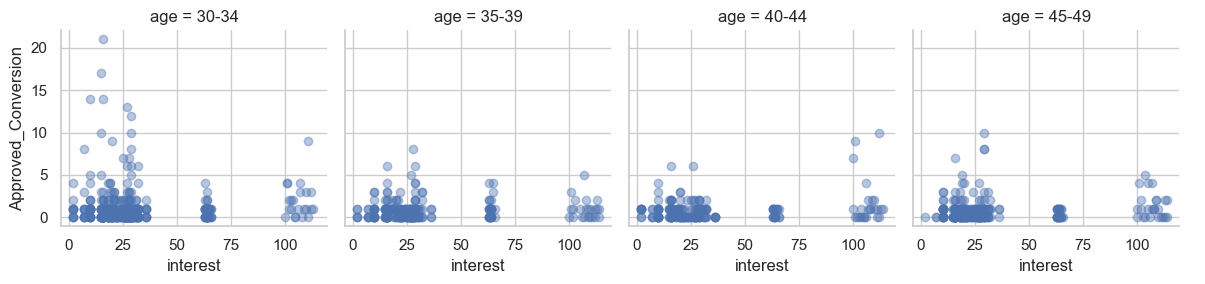

In [76]:
g = sn.FacetGrid(df, col="age")
g.map(plt.scatter, "interest", "Approved_Conversion", alpha=.4)
g.add_legend()

## It's interesting to note that, although the count of interest after 100 is less, there is a rise of users after 100 who bought the product. The rest of the distribution is according to what was expected.

# Spent

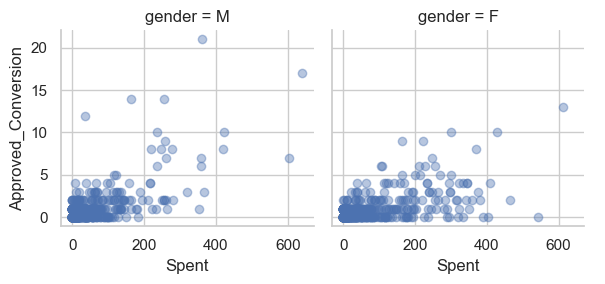

In [75]:
g = sn.FacetGrid(df, col="gender")
g.map(plt.scatter, "Spent", "Approved_Conversion", alpha=.4)
g.add_legend()

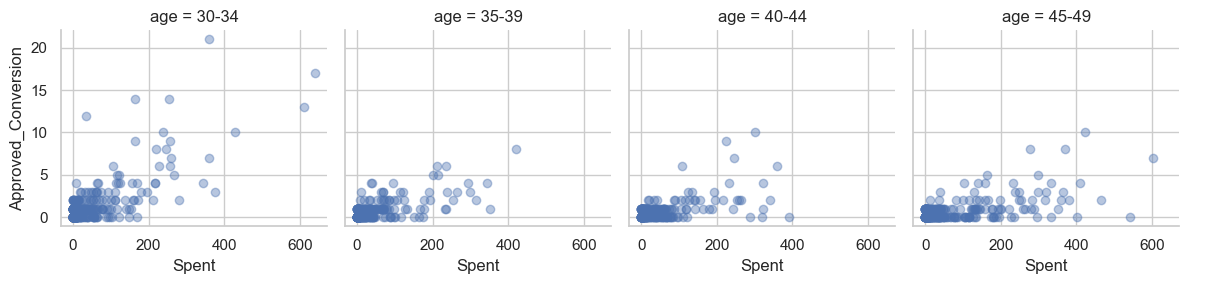

In [82]:
g = sn.FacetGrid(df, col="age")
g.map(plt.scatter, "Spent", "Approved_Conversion", alpha=.4)
g.add_legend()

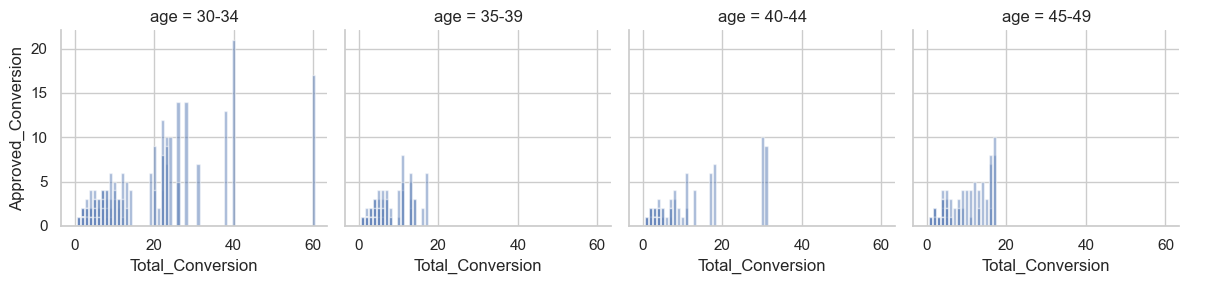

In [78]:
g = sn.FacetGrid(df, col="age")
g.map(plt.bar, "Total_Conversion", "Approved_Conversion",alpha=.5)
g.add_legend()

## We can see, that as the amount of money spent increases, no of products bought increases.

## People who actually bought the product
# After Clicking the ad ?

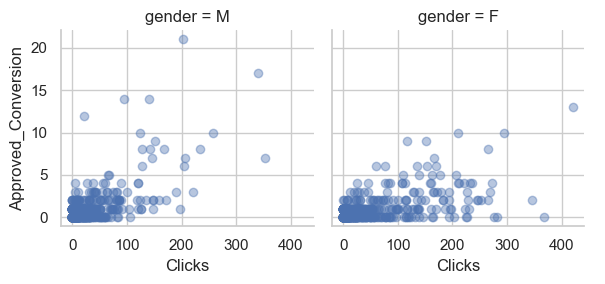

In [87]:
g = sn.FacetGrid(df, col="gender")
g.map(plt.scatter, "Clicks", "Approved_Conversion", alpha=.4)
g.add_legend()

## It seems men tend to click more than women but women buy more products than men after clicking the add.

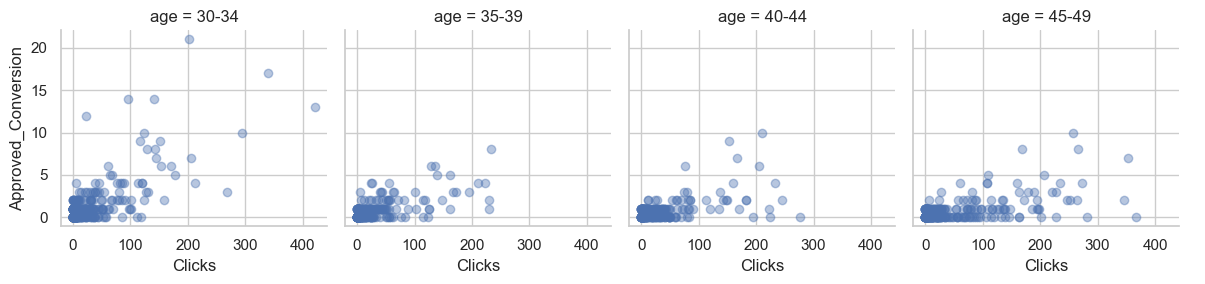

In [88]:
g = sn.FacetGrid(df, col="age")
g.map(plt.scatter, "Clicks", "Approved_Conversion", alpha=.4)
g.add_legend()

## People in age group 30-34 has more tendency to buy product after clicking the add.

# After enquiring the product?

## Let's see people who actually went from enquiring to buying the product

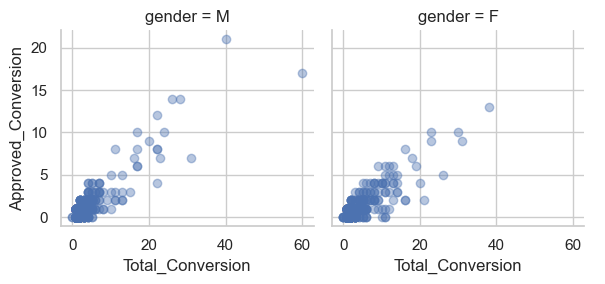

In [89]:
g = sn.FacetGrid(df, col="gender")
g.map(plt.scatter, "Total_Conversion", "Approved_Conversion", alpha=.4)
g.add_legend()

## It seems women buys more products than men after enquiring the product. However men tends to enquire more about the product.

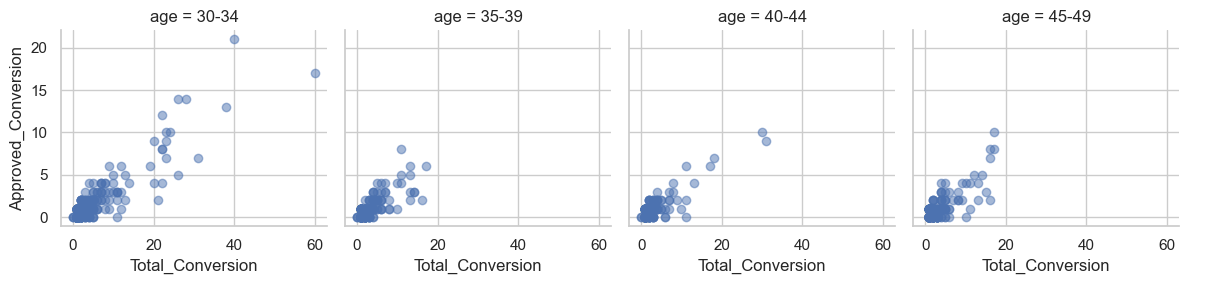

In [90]:
g = sn.FacetGrid(df, col="age")
g.map(plt.scatter, "Total_Conversion", "Approved_Conversion",alpha=.5)
g.add_legend()

## It seems people in age group 30-34 are more likely to buy the product after enquiring the product.

# Business Questions

# 1) 
 How to optimize the social ad campaigns for the highest conversion rate possible. (Attain best Reach to Conversion ratios/Click to Conversion ratios)
# ANS:-
=> Since highest conversion rate was attained in campaign_z, we can consider the factors contributed in this campaign:

The number of ad counts should be more for better reach.

The age group of 30-34 should be the main aim.

People with interest types after 100 should be given more attention

More the number of times the add is shown i.e. "impression", more approved_conversion rate is achieved.

# 2) 
Finding the perfect target demographics with the appropriate click through rates
# ANS:-
Women tend to buy the product more often after clicking the ad than men.
Also the age group 30 to 34 buy the product more often after clicking the ad
# 3)
 Understanding the ideal turnaround/decision making time per age group to convert and retarget future social campaigns
# ANS:-
Age group 30-34 tend to take less decision making time followed by 35 to 39 and 40-44.
Age group 45-49 take the most time to decide.
# 4) 
Comparing the individual campaign performance so the best creative/campaign can be run again with adjusted audiences.
# ANS:-
clearly campaign_z wins the battle due to highest approved_conversion rate.
Also campaign_x does pretty well , considering the number of ads it involves. With less no of ads, it has managed to peform better than campaign_y with large no of ads